In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import copy
import numpy as np

In [9]:
train_dir = 'images_sorted_tvts/train'
validation_dir = 'images_sorted_tvts/validation'
test_dir = 'images_sorted_tvts/test'

batch_size = 32
img_height = 224
img_width = 224

# pad images to maintain aspect ratio
def preprocess_image(image, label):
    image = tf.image.resize_with_pad(image, img_height, img_width)
    image = image / 255.0  # Normalize the images to [0, 1] range
    return image, label

In [10]:
# Get class names from train set
raw_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode='int',
    batch_size=batch_size
)
class_names = raw_ds.class_names
filenames = raw_ds.file_paths

train_ds = image_dataset_from_directory(
    train_dir,
    label_mode='int',
    batch_size=batch_size
).map(preprocess_image)

Found 4430 files belonging to 37 classes.
Found 4430 files belonging to 37 classes.


In [11]:
print(class_names)

['abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'bengal', 'birman', 'bombay', 'boxer', 'british_shorthair', 'chihuahua', 'egyptian_mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'maine_coon', 'miniature_pinscher', 'newfoundland', 'persian', 'pomeranian', 'pug', 'ragdoll', 'russian_blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'siamese', 'sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


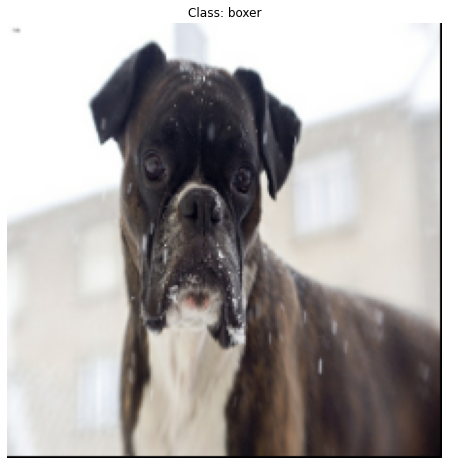

In [12]:
def display_image(dataset):
    # Take one batch of images and labels
    for images, labels in dataset.take(1):
        # Display the first image in the batch
        plt.figure(figsize=(8, 8))
        plt.imshow(images[0].numpy())
        plt.title(f"Class: {class_names[labels[0].numpy()]}")
        plt.axis('off')
        plt.show()

# Display an image from the train_ds dataset
display_image(train_ds)

In [13]:
# calculating accuracy of a random classifier as a baseline. 

# test_labels_copy = copy.copy(test_labels)
# np.random.shuffle(test_labels_copy)
# hits_array = np.array(test_labels) == np.array(test_labels_copy)
# hits_array.mean()


In [14]:
# list of pre-trained models